# <strong>Кластеризация: объединяем данные в группы</strong>
В этом примере мы рассмотрим два популярных алгоритма кластеризации: **K-means** и **иерархическую кластеризацию**. Мы будем работать с набором данных, где каждый объект представляет собой точку в многомерном пространстве, и попытаемся разделить эти точки на группы. Это игрушечная тетрадка содержит в себе самые базовые аспекты, чтобы попробовать на вкус азы алгоритмов кластеризации.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

## Генерация случайных данных
Мы создадим набор данных, состоящий из нескольких кластеров, используя функцию `make_blobs`.

In [ ]:
# Генерация данных
class Config:
    n_samples = 300
    n_clusters = 4
    random_state = 927


X, y = make_blobs(n_samples=Config.n_samples, centers=Config.n_clusters, random_state=Config.random_state)

## Нормализация данных
Нормализуем данные, чтобы наши кластеры были более заметны в этом учебном примере

### Mean среднее


$$ \mu = \frac { \sum _ { i=1 }^n x_ { i }  } { n } $$




### Deviation стандартное отклонение

$$
\sigma = \sqrt{ \frac{ \sum_{i=1}^{n} (x_i - \mu)^2 }{n} }
$$


### Итоговая формула StandartScaler

$$
norm = \frac { x - \mu } {\sigma}
$$

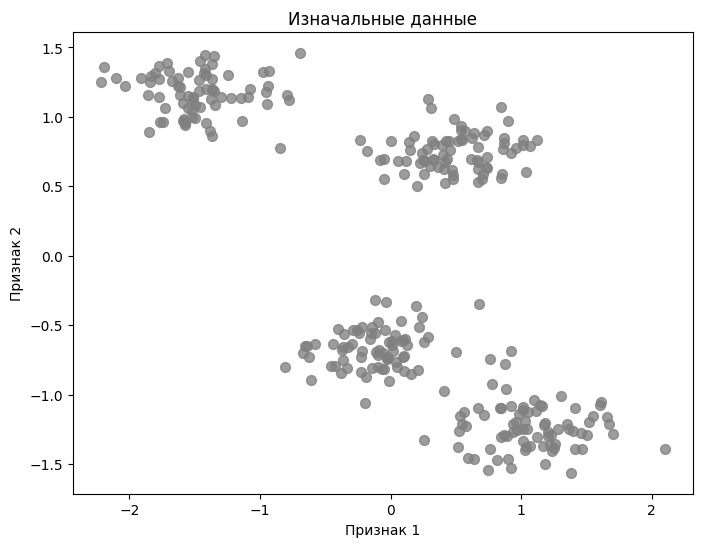

In [ ]:


# Нормализуем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Визуализируем данные
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='gray', s=50, alpha=0.78)
plt.title('Изначальные данные')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

## K-means кластеризация

### Об алгоритме KNN можно почитать здесь [тык](https://habr.com/ru/articles/801885/)

Теперь мы применим алгоритм K-means для разбиения данных на 4 кластера.


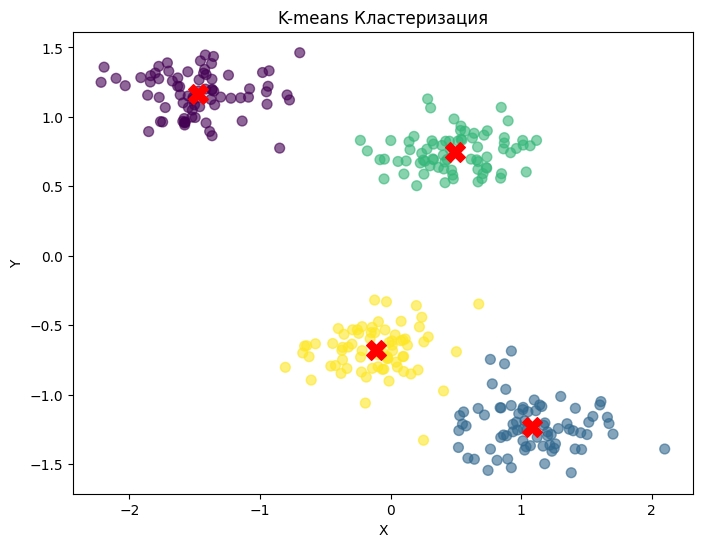

In [ ]:
kmeans = KMeans(n_clusters=Config.n_clusters, random_state=Config.random_state)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Визуализация результатов
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X')
plt.title('K-means Кластеризация')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Иерархическая кластеризация

### Об алгоритме Иерархической кластеризации можно почитать здесь [тык](https://www.learndatasci.com/glossary/hierarchical-clustering/)

Теперь применим иерархическую кластеризацию и визуализируем дендрограмму.


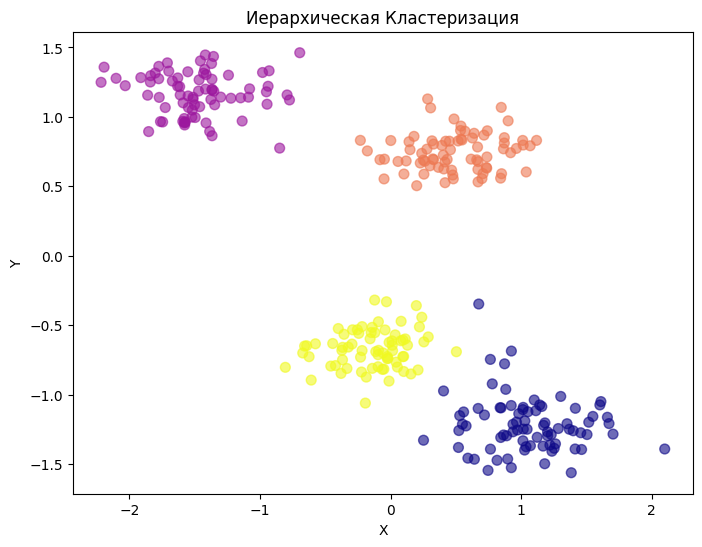

In [ ]:
agg_cluster = AgglomerativeClustering(n_clusters=Config.n_clusters)
agg_labels = agg_cluster.fit_predict(X_scaled)

# Визуализация иерархической кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='plasma', s=50, alpha=0.6)
plt.title('Иерархическая Кластеризация')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Построение дендрограммы
Дендрограмма – это графическое представление иерархической кластеризации, которое показывает, как кластеры объединяются на каждом шаге.

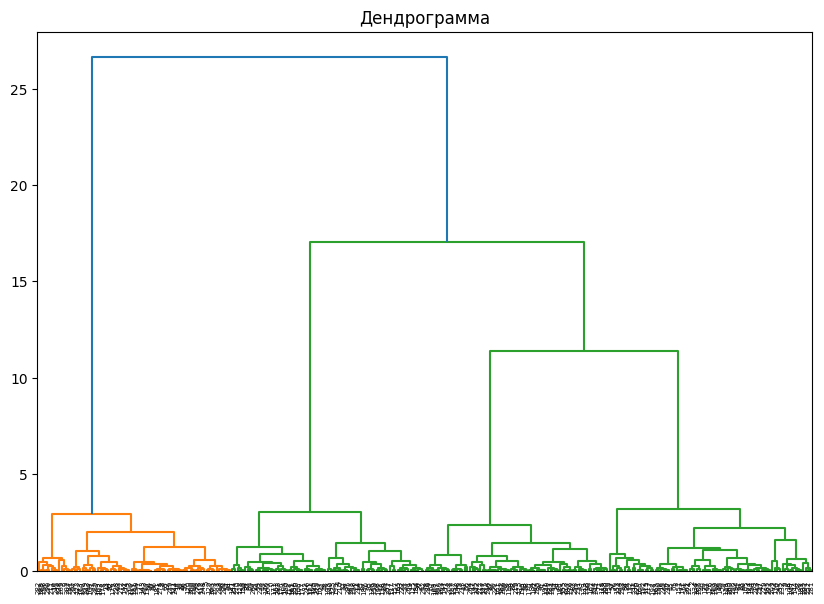

In [ ]:
# Построение дендрограммы
linked = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Дендрограмма')
plt.show()

### В следующих постах разберём с вами более подробно knn и t-sne, более продвинутые методы кластеризации



# <strong> Подписывайтесь на наши каналы и покоряйте Data World!</strong>

# [RASCAR](https://t.me/rascar)
# [Канал автора урока](https://t.me/i_am_artemid)
# [Беседа об ии и обучении](https://t.me/moment_ml)




#### Также по всем вопросам по ноутбуку можно писать в тг [тык](https://t.me/ArtemGuivan)